In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    directory=r"/kaggle/input/brain-tumor-mri-dataset/Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training' # Use only the training images
)

validation_generator = datagen.flow_from_directory(
    directory=r"/kaggle/input/brain-tumor-mri-dataset/Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation' # Use only the validation images
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [3]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

In [4]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf

In [5]:
IMAGE_SIZE = [224, 224]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

80134624/80134624 [==============================] - 0s 0us/step


In [6]:
history=model.fit(
    train_generator,
     batch_size=16,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/20
143/143 [==============================] - 77s 417ms/step - loss: 0.5484 - accuracy: 0.8147 - val_loss: 0.6108 - val_accuracy: 0.7905
Epoch 2/20
143/143 [==============================] - 31s 215ms/step - loss: 0.2132 - accuracy: 0.9215 - val_loss: 0.6013 - val_accuracy: 0.7949
Epoch 3/20
143/143 [==============================] - 32s 226ms/step - loss: 0.1395 - accuracy: 0.9495 - val_loss: 0.5908 - val_accuracy: 0.8063
Epoch 4/20
143/143 [==============================] - 33s 227ms/step - loss: 0.1069 - accuracy: 0.9646 - val_loss: 0.5046 - val_accuracy: 0.8545
Epoch 5/20
143/143 [==============================] - 32s 223ms/step - loss: 0.0712 - accuracy: 0.9790 - val_loss: 0.4972 - val_accuracy: 0.8501
Epoch 6/20
143/143 [==============================] - 31s 215ms/step - loss: 0.0612 - accuracy: 0.9847 - val_loss: 0.5279 - val_accuracy: 0.8396
Epoch 7/20
143/143 [==============================] - 30s 212ms/step - loss: 0.0559 - accuracy: 0.9858 - val_loss: 0.5386 - val_ac

In [7]:
import matplotlib.pyplot as plt

Training Accuracy :  0.9784511089324951
Validation Accuracy :  0.8432515323162079


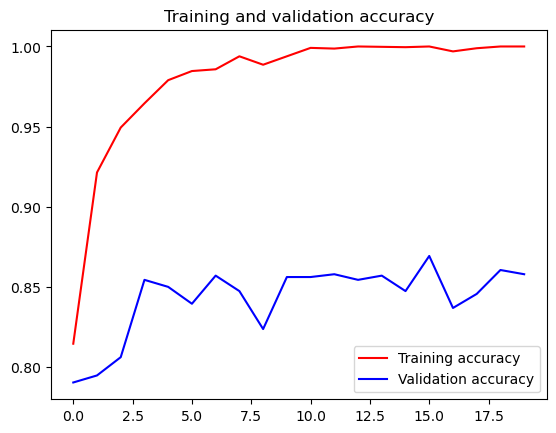

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean
acc = history.history['accuracy']
print("Training Accuracy : ",mean(acc))
val_acc = history.history['val_accuracy']
print("Validation Accuracy : ",mean(val_acc))
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

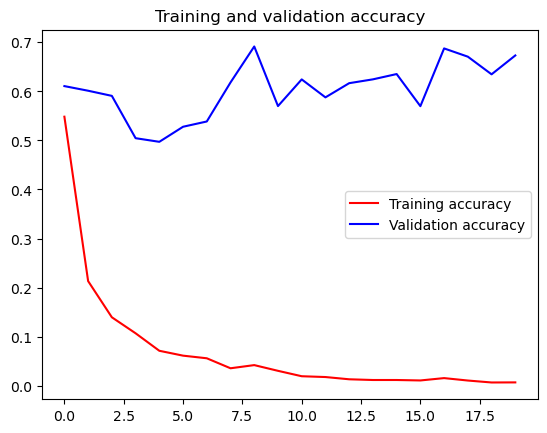

<Figure size 640x480 with 0 Axes>

In [9]:
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

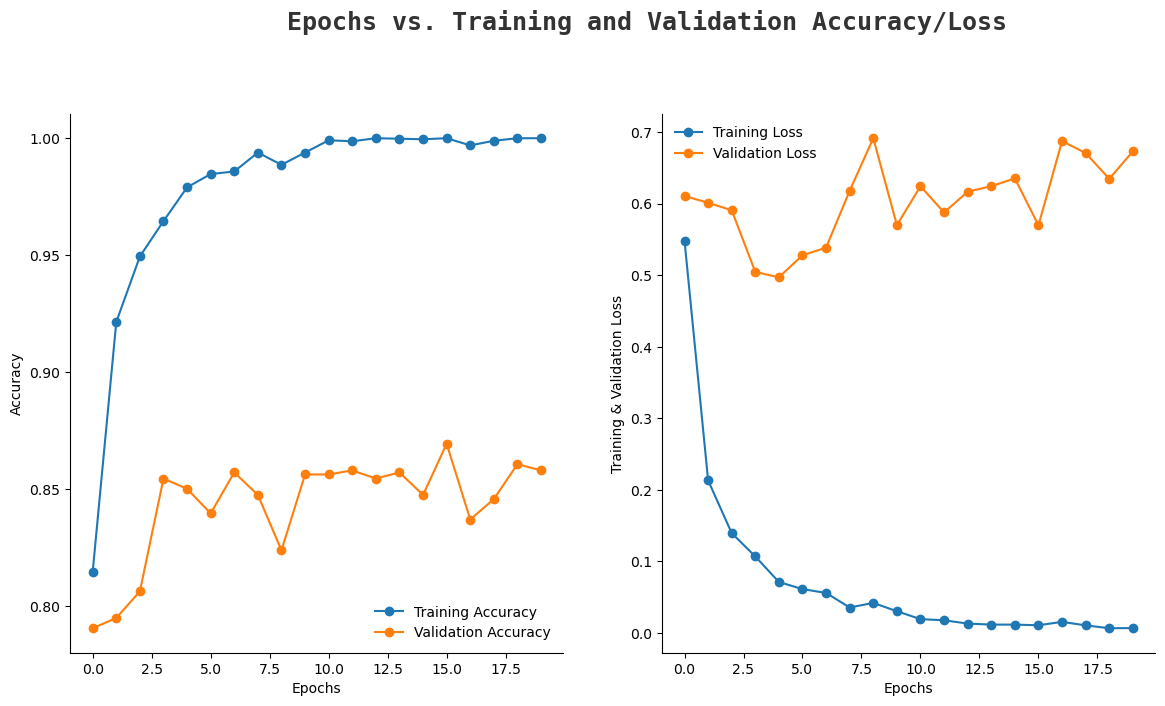

In [10]:
import seaborn as sns
epoch = [i for i in range(0,20)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [11]:
test_generator = datagen.flow_from_directory(
    directory=r"/kaggle/input/brain-tumor-mri-dataset/Testing",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training' # Use only the testing images
)

Found 1049 images belonging to 4 classes.


In [12]:
model.evaluate(test_generator)

33/33 [==============================] - 14s 419ms/step - loss: 0.1962 - accuracy: 0.9466


[0.19624988734722137, 0.9466158151626587]

In [13]:
history1=model.fit(
    train_generator,
     batch_size=32,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/20
143/143 [==============================] - 31s 218ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.6416 - val_accuracy: 0.8650
Epoch 2/20
143/143 [==============================] - 31s 218ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.6714 - val_accuracy: 0.8606
Epoch 3/20
143/143 [==============================] - 32s 226ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.6756 - val_accuracy: 0.8563
Epoch 4/20
143/143 [==============================] - 31s 215ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.6671 - val_accuracy: 0.8606
Epoch 5/20
143/143 [==============================] - 31s 214ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.6731 - val_accuracy: 0.8563
Epoch 6/20
143/143 [==============================] - 30s 212ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.6838 - val_accuracy: 0.8615
Epoch 7/20
143/143 [==============================] - 31s 216ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.6559 - val_ac

In [14]:
model.evaluate(test_generator)

33/33 [==============================] - 5s 152ms/step - loss: 0.2324 - accuracy: 0.9476


[0.23238325119018555, 0.9475691318511963]

Training Accuracy :  1.0
Validation Accuracy :  0.8595968574285507


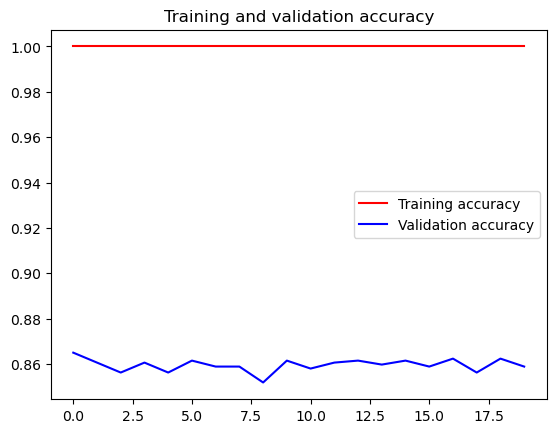

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean
acc = history1.history['accuracy']
print("Training Accuracy : ",mean(acc))
val_acc = history1.history['val_accuracy']
print("Validation Accuracy : ",mean(val_acc))
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

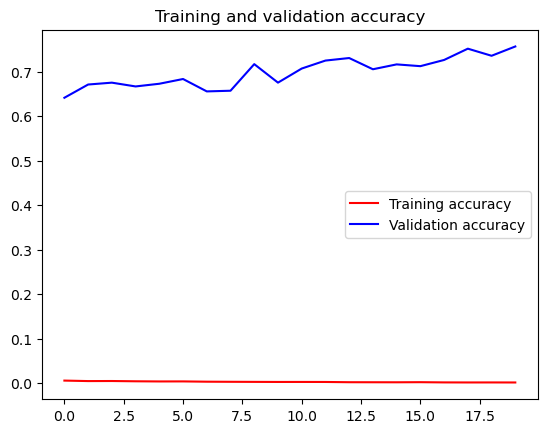

<Figure size 640x480 with 0 Axes>

In [16]:
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()